# This is a Python implementation of the introductory Lab from the book "An Introduction to Statistical Learning with Applications in R".

## 1. Basic Commands

In [66]:
# import the relevant libraries
import numpy as np # this will be used to create vectors and matrices of data
import random # to set the seed to a specific value

In [67]:
# consider how we would generate a vector of random normal variables
mu = 0
sigma = 1

x = np.random.normal(mu, sigma, 50)

In [68]:
# we create another vector of random normal variables, but correlated to the first
y = np.random.normal(50, 0.1, 50) + x

In [69]:
# we find the correlation between the two sets
print("Correlation:", np.corrcoef(x, y)[0, 1])

Correlation: 0.9944595464716581


## 2. Graphics

In [70]:
# we will use matplotlib for plotting in Python
import matplotlib.pyplot as plt

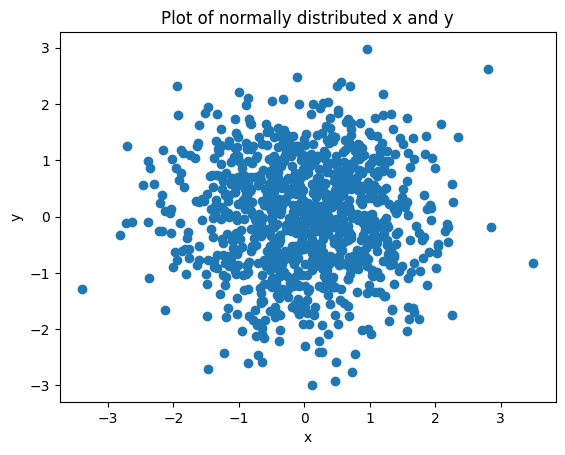

In [71]:
x = np.random.normal(0, 1, 1000)
y = np.random.normal(0, 1, 1000)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of normally distributed x and y")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

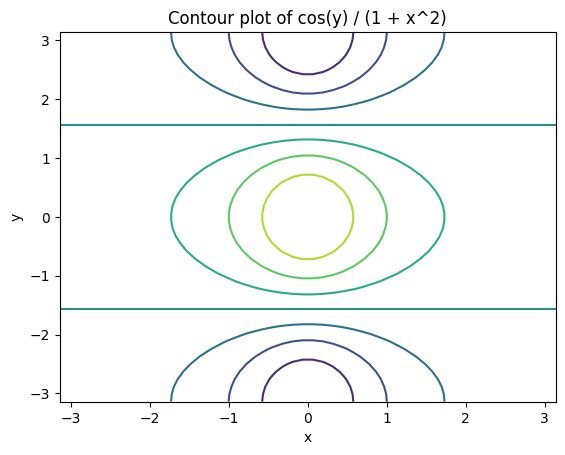

In [72]:
# consider how we generate contour plots
import math
x = np.linspace(-math.pi, math.pi, 50)
y = x.copy()
X, Y = np.meshgrid(x, y)
Z = np.cos(Y) / (1 + np.power(X, 2))
contour_plot = plt.contour(X, Y, Z)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Contour plot of cos(y) / (1 + x^2)")
plt.show

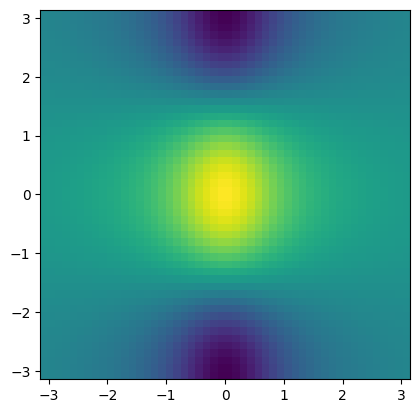

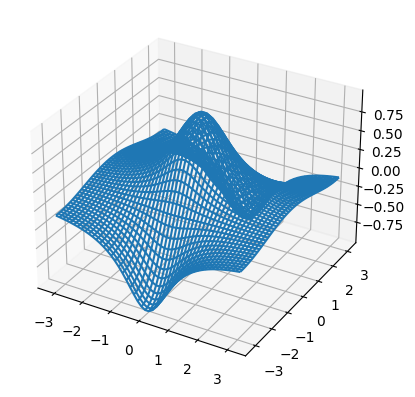

In [73]:
# we can also plot the contour as a heat map
plt.imshow(Z, extent = (x[0], x[-1], y[0], y[-1]))
plt.show()

# or as a 3D plot
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_wireframe(X, Y, Z)
plt.show()

## 3. Loading Data

In [74]:
# in Python we shall use pandas to load data into dataframes
import pandas as pd

### We import the Auto dataset, found on the book's website. Note that there is a header, and missing values are marked using a quetion mark, '?'.

In [75]:
Auto = pd.read_csv('Auto.csv', header=0, na_values='?')

In [76]:
# show the first few (5 by default) rows of the data set
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [77]:
# consider the 32nd row of the data set, which contains a missing value
Auto.iloc[32]

mpg                   25.0
cylinders                4
displacement          98.0
horsepower             NaN
weight                2046
acceleration          19.0
year                    71
origin                   1
name            ford pinto
Name: 32, dtype: object

In [78]:
# print the shape of the data set
print("Data set size:", Auto.shape)

# print the column labels of the data set
for column_name in Auto.columns:
    print(column_name)

Data set size: (397, 9)
mpg
cylinders
displacement
horsepower
weight
acceleration
year
origin
name


In [79]:
# we can find the number of entries in the data set with missing values
print(Auto.isnull().sum())

# and remove these rows from the data frame
Auto = Auto.dropna()
print("Reduced data set size:", Auto.shape)

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64
Reduced data set size: (392, 9)


## 5. Additional Graphical and Numerical Summaries of Data sets

<function matplotlib.pyplot.show(close=None, block=None)>

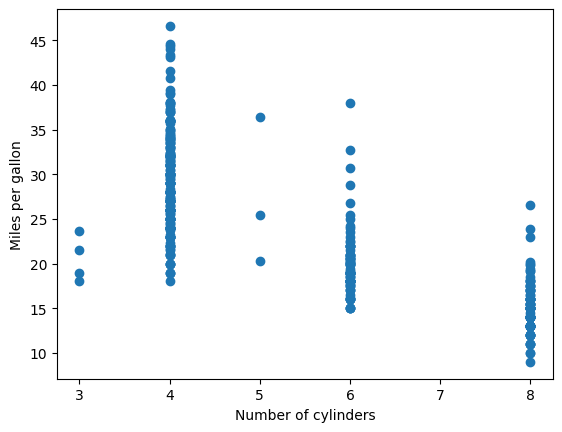

In [80]:
# we can plot specific columns of data sets to inspect correlations
plt.scatter(Auto.cylinders, Auto.mpg)
plt.xlabel("Number of cylinders")
plt.ylabel("Miles per gallon")
plt.show

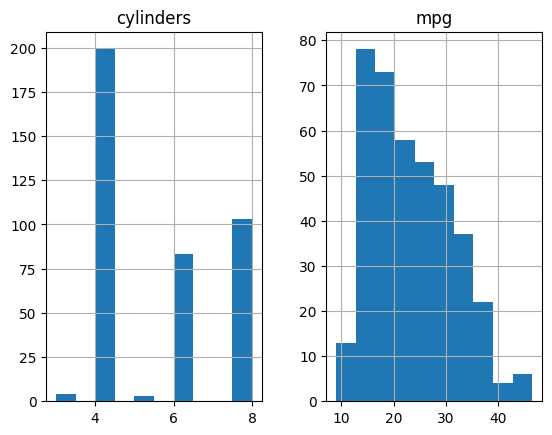

In [81]:
# we can also plot histograms of certain variable directly within the pandas dataframe
Auto.hist(column=['cylinders', 'mpg'])
plt.show()

In [82]:
# we can use the describe() pandas method to get a summary of the data set, including statistical information about the entries
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [83]:
# note that the cylinders variable contains only integers, so it makes sense to view it as a categorical variable
Auto['cylinders'] = Auto['cylinders'].astype('category')
Auto.dtypes

mpg              float64
cylinders       category
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
year               int64
origin             int64
name              object
dtype: object